In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
batch_size = 100
img_height = 250
img_width = 250

In [ ]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'drive/MyDrive/AccidentDetection/data/train',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'drive/MyDrive/AccidentDetection/data/test',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    'drive/MyDrive/AccidentDetection/data/val',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)


Found 752 files belonging to 2 classes.
Found 99 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [ ]:
for image in training_ds:
  print(image)


In [ ]:
print(training_ds.class_names)

In [ ]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(2, activation= 'softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 50,callbacks=[es])

Epoch 1/50
8/8 [==============================] - 196s 17s/step - loss: 0.7968 - accuracy: 0.5519 - val_loss: 0.6705 - val_accuracy: 0.5306
Epoch 2/50
8/8 [==============================] - 48s 6s/step - loss: 0.5593 - accuracy: 0.7194 - val_loss: 0.5601 - val_accuracy: 0.7551
Epoch 3/50
8/8 [==============================] - 49s 6s/step - loss: 0.3563 - accuracy: 0.8285 - val_loss: 0.4784 - val_accuracy: 0.7857
Epoch 4/50
8/8 [==============================] - 48s 6s/step - loss: 0.2206 - accuracy: 0.9109 - val_loss: 0.7107 - val_accuracy: 0.8163
Epoch 5/50
8/8 [==============================] - 47s 6s/step - loss: 0.1630 - accuracy: 0.9388 - val_loss: 0.5939 - val_accuracy: 0.8776
Epoch 6/50
8/8 [==============================] - 47s 6s/step - loss: 0.0952 - accuracy: 0.9734 - val_loss: 0.6126 - val_accuracy: 0.8367
Epoch 7/50
8/8 [==============================] - 47s 6s/step - loss: 0.0599 - accuracy: 0.9774 - val_loss: 0.5660 - val_accuracy: 0.8878
Epoch 8/50
8/8 [================

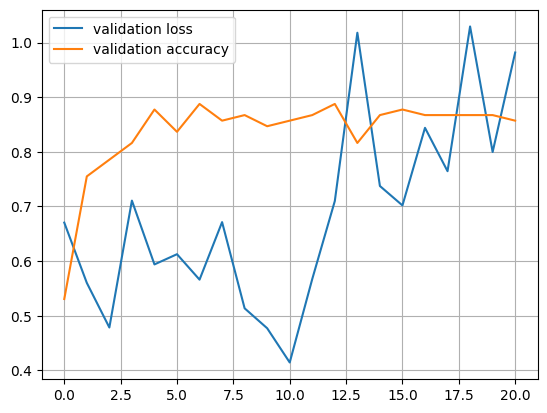

In [ ]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 [==============================] - 5s 1s/step


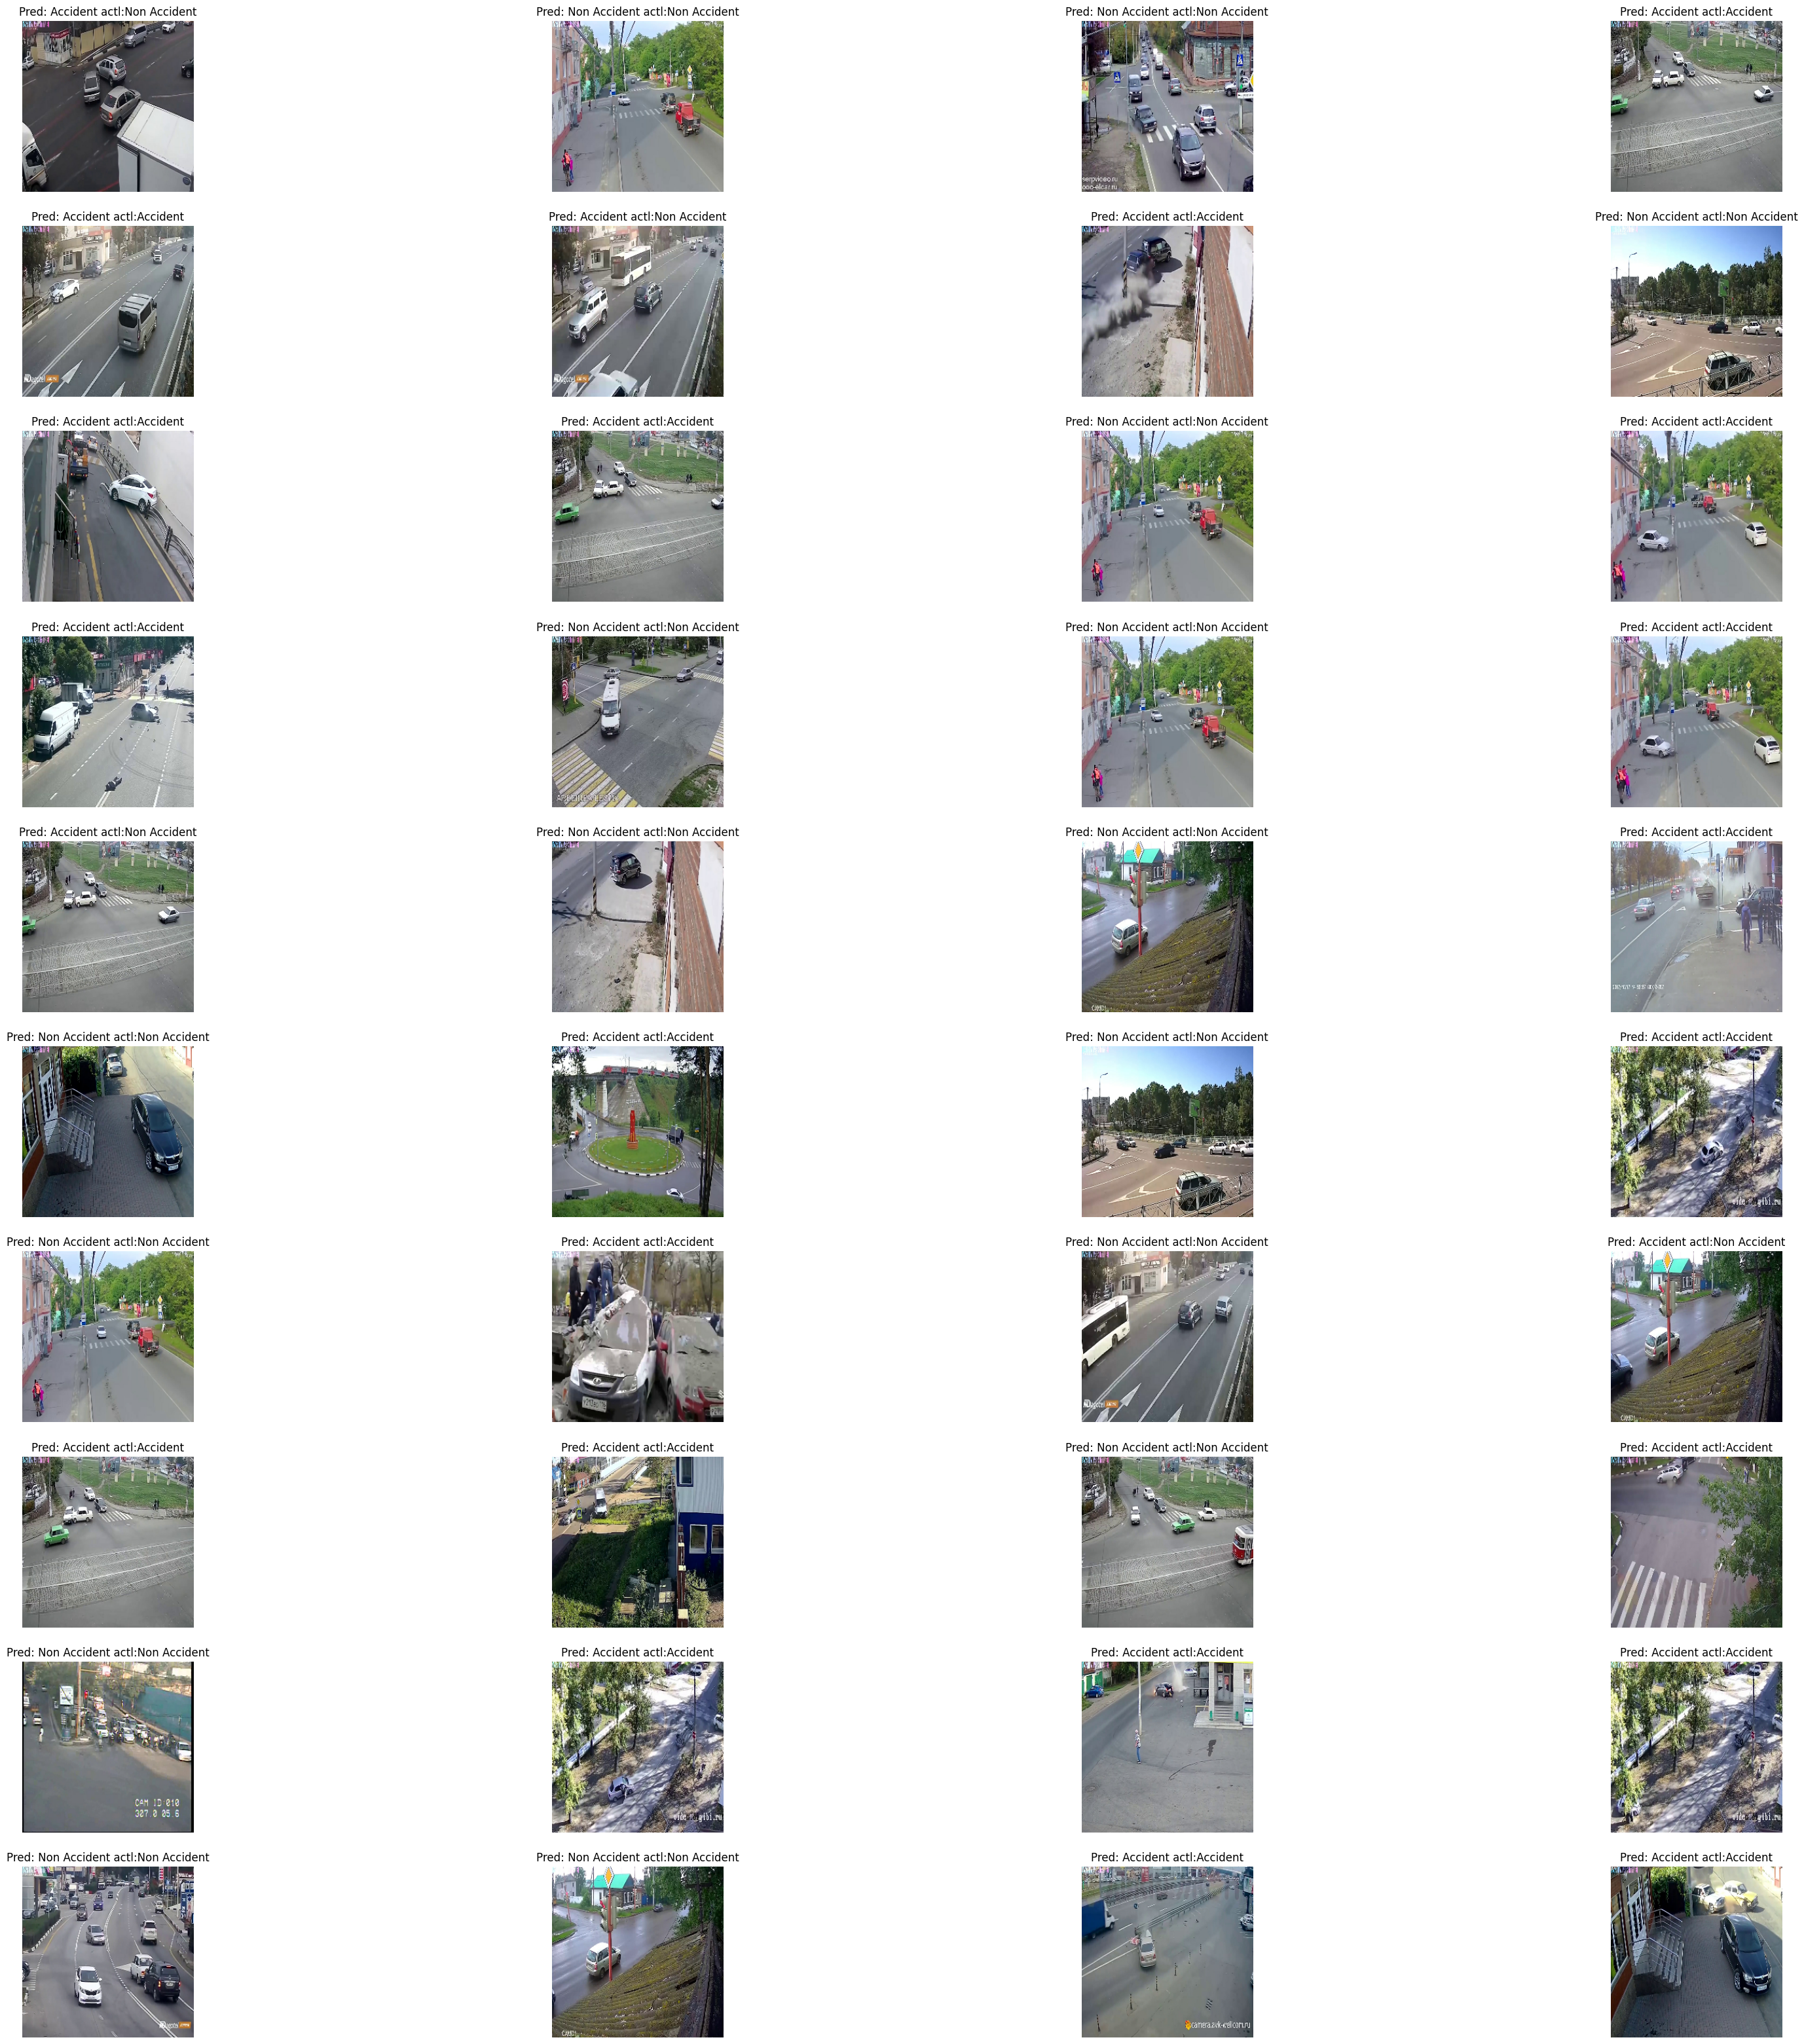

In [ ]:
AccuracyVector = []
plt.figure(figsize=(40, 40))
for images, labels in testing_ds.take(1):
    # print(labels)
    predictions = model.predict(images)
    # print(predictions)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
        # print(class_names[np.argmax(mem)])

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [ ]:
print(class_names)

['Accident', 'Non Accident']


In [ ]:
print(predlabel)

['Accident', 'Non Accident', 'Non Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Non Accident', 'Accident', 'Accident', 'Non Accident', 'Accident', 'Accident', 'Non Accident', 'Non Accident', 'Accident', 'Accident', 'Non Accident', 'Non Accident', 'Accident', 'Non Accident', 'Accident', 'Non Accident', 'Accident', 'Non Accident', 'Accident', 'Non Accident', 'Accident', 'Accident', 'Accident', 'Non Accident', 'Accident', 'Non Accident', 'Accident', 'Accident', 'Accident', 'Non Accident', 'Non Accident', 'Accident', 'Accident', 'Non Accident', 'Accident', 'Accident', 'Accident', 'Non Accident', 'Non Accident', 'Non Accident', 'Accident', 'Non Accident', 'Accident', 'Non Accident', 'Accident', 'Non Accident', 'Accident', 'Non Accident', 'Accident', 'Accident', 'Non Accident', 'Non Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Non Accident', 'Non Accident', 'Non Accident', 'Accident', 'Non Accident', 'Non Accident', 'Accident', 'Non Accident', 'Non Ac

In [ ]:
truePositive=0
trueNegative=0
falsePositive=0
falseNegative=0
#positive event is accident negative event is non accident
for i in range(0,100):
    if(predlabel[i]==class_names[labels[i]] and predlabel[i]=='Accident'):
        truePositive+=1
    elif(predlabel[i]==class_names[labels[i]] and predlabel[i]=='Non Accident'):
        trueNegative+=1
    elif(predlabel[i]=='Non Accident' and class_names[labels[i]]=='Accident'):
        falseNegative+=1
    else:
        falsePositive+=1

IndexError: list index out of range

In [ ]:
print(f'True positives are: {truePositive}')
print(f'True negatives are: {trueNegative}')
print(f'False negatives are: {falseNegative}')
print(f'False positives are: {falsePositive}')

In [ ]:
import pickle
pickle.dump(model,open("accPred.pkl","wb"))

In [ ]:
with open('/content/drive/MyDrive/accPred.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
model.save('new_model.keras')